In [2]:
## bibliotecas
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

In [3]:
## dataframes
db_states = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
mapa_estados = 'https://raw.githubusercontent.com/PericlesSavio/Python-Notebooks/main/covid/br_states.json'
brasil_pop = pd.read_csv('https://raw.githubusercontent.com/PericlesSavio/Python-Notebooks/main/covid/estados_pop.csv')
db_states = pd.merge(db_states, brasil_pop, left_on='state',right_on='Sigla',how='outer',suffixes=('_left','_right'))

In [4]:
## variável ontem e hoje
import datetime
hoje = datetime.date.today()
ontem = hoje - datetime.timedelta(days=1)
ontem = str(ontem)
## data no formato dd-mm-aaaa
from datetime import datetime
ontem_str = datetime.strptime(ontem, "%Y-%m-%d")
ontem_str = ontem_str.strftime("%d-%m-%Y")

In [5]:
## dados 24h
df_estados_24h = db_states[(db_states.date == ontem) & (db_states.state != 'TOTAL')].sort_values(by=['newDeaths'], ascending=False)
df_estados_24h_soma = df_estados_24h.sum()
df_estados_24h_soma

epi_week                                                                              3402
date                                     2021-07-012021-07-012021-07-012021-07-012021-0...
country                                  BrazilBrazilBrazilBrazilBrazilBrazilBrazilBraz...
state                                    SPRJPRMGRSBAPASCPEMTCEESMAPBGOALSEDFROPIAMAPAC...
city                                     TOTALTOTALTOTALTOTALTOTALTOTALTOTALTOTALTOTALT...
newDeaths                                                                             1871
deaths                                                                              520359
newCases                                                                             58399
totalCases                                                                        18628777
deathsMS                                                                            520095
totalCasesMS                                                                      18622304

In [6]:
## funções personalizadas
def mapa_brasil(z, hovertemplate, title_text):
    return go.Figure(go.Choroplethmapbox(geojson=mapa_estados, locations=df_estados_24h.state, z=z, colorscale="rdylgn", marker_opacity=1, marker_line_width=1,
                    hovertemplate = df_estados_24h.UF + "<br>"+hovertemplate)).update_layout(mapbox_style="carto-positron", mapbox_zoom=2.9, mapbox_center = {"lat": -15.3556, "lon": -56.0506}, title_text=title_text, title_y=0.1, margin={"r":0,"t":0,"l":0,"b":0})
# return mapa.show()

def barra_vertical(x, y, hovertext, title, xaxis_title, yaxis_title):
    return go.Figure(data=[go.Bar(x=x, y=y, hovertext=hovertext)]).update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
    opacity=0.6).update_layout(title = title, xaxis_title=xaxis_title, yaxis_title=yaxis_title, hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"))

In [7]:
## Vacinação 1ª dose
mapa_brasil(z = df_estados_24h.vaccinated_per_100_inhabitants, hovertemplate = 'Vacinados: %{z:.2f}%<extra></extra>',title_text='Percentual de<br>vacinados com a 1ª dose.')

In [8]:
## Vacinação 1ª dose
mapa_brasil(z = df_estados_24h.vaccinated_second_per_100_inhabitants, hovertemplate = 'Vacinados: %{z:.2f}%<extra></extra>',title_text='Percentual de<br>vacinados com a 2ª dose.')

In [9]:
#Casos 24h
barra_vertical(x=df_estados_24h.state, y=df_estados_24h.newCases.sort_values(ascending=False), hovertext=df_estados_24h.state,
            title = "Casos nas últimas 24h (" + str(ontem_str) + "): " + str(df_estados_24h_soma.newCases), xaxis_title="Estados", yaxis_title="Nº de casos")

In [10]:
#óbitos 24h
barra_vertical(x=df_estados_24h.state, y=df_estados_24h.newDeaths, hovertext=df_estados_24h.state,
            title = "Óbitos nas últimas 24h (" + str(ontem_str) + "): " + str(df_estados_24h_soma.newDeaths), xaxis_title="Estados", yaxis_title="Nº de óbitos")

In [11]:
## Vacinação 1ª dose
mapa_brasil(z = df_estados_24h.newCases, hovertemplate = 'Vacinados: %{z:.2f}%<extra></extra>',title_text="Casos nas últimas 24h (" + str(ontem_str) + "): " + str(df_estados_24h_soma.newCases))

21.86
21.9
22.03
22.2
22.44
22.73
22.95
23.01
22.92
22.91
22.94
22.95
23.04
23.21
23.23
23.25
23.29
23.38
23.39
23.3
23.23
23.15
23.03
23.04
23.16
23.22
23.22
23.16
23.18


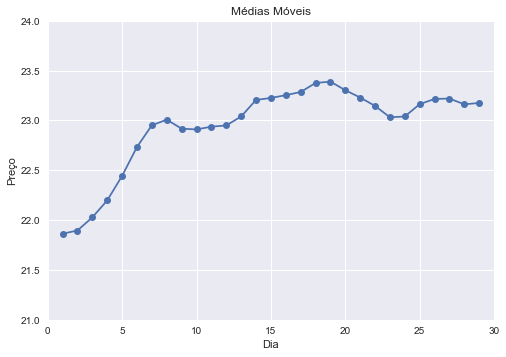

In [13]:
"""
Created on Thu Dec 3 12:05:44 2020
@author: Fábio dos Reis
"""
import matplotlib.pyplot as plt



valores = [21.95,21.84,21.9,21.98,21.65,22.11,22.50,22.75,23.21,23.1,23.20,22.78,22.30,23.17,23.24,23.26,23.23,23.13,23.27,23.38,23.42,23.68,23.20,22.84,23.01,23.00,23.11,23.24,23.46,23.27,23.02,22.82,23.31] # cotações diárias

tam_grupo = 5 # deslocamento (uma semana útil)
i = 0
medias_moveis=[]

# Calcular as médias móveis e armazená-las em uma lista:
while i < len(valores) - tam_grupo + 1:
    grupo = valores[i : i + tam_grupo]
    media_grupo = sum(grupo) / tam_grupo
    medias_moveis.append(media_grupo)
    i +=1

# Exibir a lista de médias móveis
for valor in medias_moveis:
    print(round(valor,2))

# Gerar lista com dias do mês
dia_mes = []
for dia in range(1,len(medias_moveis)+1):
    dia_mes.append(dia)

# Visualizar gráfico de médias móveis
plt.style.use('seaborn')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.title('Médias Móveis')
plt.axis(ymin=21,ymax=24,xmin=0,xmax=30)
plt.plot(dia_mes,medias_moveis,marker='o')
plt.show()

In [21]:
def media_movel(valores, tam_grupo):
    i = 0
    medias_moveis=[]

    # Calcular as médias móveis e armazená-las em uma lista:
    while i < len(valores) - tam_grupo + 1:
        grupo = valores[i : i + tam_grupo]
        media_grupo = sum(grupo) / tam_grupo
        medias_moveis.append(media_grupo)
        i +=1

    # Exibir a lista de médias móveis
    for valor in medias_moveis:
        print(round(valor,2))

    # Gerar lista com dias do mês
    dia_mes = []
    for dia in range(1,len(medias_moveis)+1):
        dia_mes.append(dia)

a = media_movel(valores = db_states.newDeaths, tam_grupo=5)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.8
1.0
1.8
3.0
4.2
5.2
7.0
7.8
8.6
9.2
10.8
11.6
13.0
15.6
19.2
20.8
24.2
29.4
27.8
28.0
36.6
41.8
47.2
53.0
51.2
43.4
36.0
39.8
47.6
58.6
68.0
76.6
64.0
51.8
48.0
41.2
70.8
99.4
126.0
121.4
138.2
140.8
147.0
141.6
162.2
152.2
115.6
81.4
95.2
106.8
124.0
157.8
190.8
171.6
139.6
148.6
140.4
141.4
158.4
189.0
166.6
141.0
166.4
172.4
174.0
198.2
244.4
203.2
171.4
173.0
187.8
187.0
222.4
262.4
238.4
191.0
202.8
200.2
205.8
245.4
278.2
230.2
182.4
192.2
204.0
217.4
244.6
278.6
234.4
181.0
197.4
230.6
253.0
307.6
345.4
291.2
222.6
244.4
224.0
253.0
275.6
325.8
254.0
209.2
200.8
212.8
217.6
271.2
319.6
263.0
220.8
224.8
218.8
224.4
272.8
313.6
274.6
223.8
241.2
239.6
267.2
305.8
348.0
281.6
229.6
226.6
231.0
249.4
294.8
345.8
287.0
228.8
233.0
236.6
238.6
278.2
312.0
251.6
195.2
198.4
222.4
242.4
283.6
330.2
282.4
208.4
224.6
226.8
261.6
299.8
325.8
256.2
206.0
198.2
195.6
225.0
260.6
298.6
230.4
182.8
201.4
207.8
204.6


In [25]:
a

In [26]:
fig = go.Figure(
    data=[go.Scatter(y=db_states.newDeaths, line=dict(color="crimson"))],
    layout=dict(title=dict(text="A Graph Objects Figure Without Magic Underscore Notation"))
)

fig.show()

In [14]:
db_states

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,UF,Sigla,CódigoIBGE,População,Região
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,35.0,45919049.0,Sudeste
1,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,35.0,45919049.0,Sudeste
2,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,35.0,45919049.0,Sudeste
3,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,35.0,45919049.0,Sudeste
4,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,São Paulo,SP,35.0,45919049.0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13365,126,2021-06-28,Brazil,RR,TOTAL,0,1731,14,111858,1731,...,24.89150,64590.0,10.66262,NaN,NaN,Roraima,RR,14.0,605761.0,Norte
13366,126,2021-06-29,Brazil,RR,TOTAL,14,1745,275,112133,1731,...,25.08960,64714.0,10.68309,NaN,NaN,Roraima,RR,14.0,605761.0,Norte
13367,126,2021-06-30,Brazil,RR,TOTAL,2,1747,510,112643,1745,...,25.65748,64892.0,10.71248,NaN,NaN,Roraima,RR,14.0,605761.0,Norte
13368,126,2021-07-01,Brazil,RR,TOTAL,0,1747,0,112643,1747,...,26.13572,65128.0,10.75143,NaN,NaN,Roraima,RR,14.0,605761.0,Norte
